In [2]:
import pandas as pd
from sklearn.datasets import load_boston
data = load_boston()
X, Y = data['data'], data['target']
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b 

损失函数更改为: $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [6]:

def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))


def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
         if y_i > y_hat_i:
             gradient += -1 *  x_i
         else:
             if y_i < y_hat_i:
                 gradient +=  x_i
         
    return 1 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
         if y_i > y_hat_i:
             gradient += -1
         else:
             if y_i < y_hat_i:
                 gradient += 1
    
    return 1 / n * gradient

In [14]:
import random
trying_times = 200000

X, y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-05


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss_abs(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 1.182928515196508 best_b: -21.617167347391046, and the loss is: 36.71570044711874
When time is : 50, get best_k: 1.1860708323901799 best_b: -21.616667347391065, and the loss is: 36.695452132427484
When time is : 100, get best_k: 1.1892131495838516 best_b: -21.616167347391084, and the loss is: 36.67520381773613
When time is : 150, get best_k: 1.1923554667775234 best_b: -21.615667347391103, and the loss is: 36.65495550304485
When time is : 200, get best_k: 1.195497783971195 best_b: -21.61516734739112, and the loss is: 36.634707188353566
When time is : 250, get best_k: 1.1986401011648669 best_b: -21.61466734739114, and the loss is: 36.61445887366227
When time is : 300, get best_k: 1.2017824183585386 best_b: -21.61416734739116, and the loss is: 36.59421055897101
When time is : 350, get best_k: 1.2049247355522104 best_b: -21.61366734739118, and the loss is: 36.5739622442797
When time is : 400, get best_k: 1.208067052745882 best_b: -21.613167347391197, and the l

When time is : 3650, get best_k: 1.412317670334546 best_b: -21.580667347392428, and the loss is: 35.237573474653985
When time is : 3700, get best_k: 1.4154599875282177 best_b: -21.580167347392447, and the loss is: 35.2173251599628
When time is : 3750, get best_k: 1.4186023047218894 best_b: -21.579667347392466, and the loss is: 35.19707684527145
When time is : 3800, get best_k: 1.4217446219155612 best_b: -21.579167347392485, and the loss is: 35.17682853058016
When time is : 3850, get best_k: 1.424886939109233 best_b: -21.578667347392503, and the loss is: 35.15658021588887
When time is : 3900, get best_k: 1.4280292563029047 best_b: -21.578167347392522, and the loss is: 35.136331901197536
When time is : 3950, get best_k: 1.4311715734965764 best_b: -21.57766734739254, and the loss is: 35.11608358650629
When time is : 4000, get best_k: 1.4343138906902482 best_b: -21.57716734739256, and the loss is: 35.095835271815005
When time is : 4050, get best_k: 1.43745620788392 best_b: -21.576667347392

When time is : 7550, get best_k: 1.6574184114409425 best_b: -21.541667347393904, and the loss is: 33.658204928732864
When time is : 7600, get best_k: 1.6605607286346142 best_b: -21.541167347393923, and the loss is: 33.63795661404158
When time is : 7650, get best_k: 1.663703045828286 best_b: -21.540667347393942, and the loss is: 33.61770829935025
When time is : 7700, get best_k: 1.6668453630219577 best_b: -21.54016734739396, and the loss is: 33.59745998465898
When time is : 7750, get best_k: 1.6699876802156295 best_b: -21.53966734739398, and the loss is: 33.57721166996771
When time is : 7800, get best_k: 1.6731299974093012 best_b: -21.539167347394, and the loss is: 33.556963355276416
When time is : 7850, get best_k: 1.676272314602973 best_b: -21.538667347394018, and the loss is: 33.53671504058507
When time is : 7900, get best_k: 1.6794146317966447 best_b: -21.538167347394037, and the loss is: 33.51646672589377
When time is : 7950, get best_k: 1.6825569489903165 best_b: -21.5376673473940

When time is : 11350, get best_k: 1.8962345181599956 best_b: -21.503667347395343, and the loss is: 32.11933301219429
When time is : 11400, get best_k: 1.8993768353536673 best_b: -21.50316734739536, and the loss is: 32.09908469750299
When time is : 11450, get best_k: 1.902519152547339 best_b: -21.50266734739538, and the loss is: 32.078836382811694
When time is : 11500, get best_k: 1.9056614697410108 best_b: -21.5021673473954, and the loss is: 32.0585880681204
When time is : 11550, get best_k: 1.9088037869346826 best_b: -21.50166734739542, and the loss is: 32.03833975342907
When time is : 11600, get best_k: 1.9119461041283543 best_b: -21.501167347395437, and the loss is: 32.018091438737784
When time is : 11650, get best_k: 1.915088421322026 best_b: -21.500667347395456, and the loss is: 31.99784312404648
When time is : 11700, get best_k: 1.9182307385156978 best_b: -21.500167347395475, and the loss is: 31.977594809355168
When time is : 11750, get best_k: 1.9213730557093696 best_b: -21.4996

When time is : 15100, get best_k: 2.131908307685377 best_b: -21.466167347396762, and the loss is: 30.600709410347
When time is : 15150, get best_k: 2.1350506248790486 best_b: -21.46566734739678, and the loss is: 30.580461095655682
When time is : 15200, get best_k: 2.1381929420727204 best_b: -21.4651673473968, and the loss is: 30.56021278096436
When time is : 15250, get best_k: 2.141335259266392 best_b: -21.46466734739682, and the loss is: 30.53996446627309
When time is : 15300, get best_k: 2.144477576460064 best_b: -21.464167347396838, and the loss is: 30.519716151581793
When time is : 15350, get best_k: 2.1476198936537356 best_b: -21.463667347396857, and the loss is: 30.499467836890524
When time is : 15400, get best_k: 2.1507622108474074 best_b: -21.463167347396876, and the loss is: 30.47921952219921
When time is : 15450, get best_k: 2.153904528041079 best_b: -21.462667347396895, and the loss is: 30.458971207507886
When time is : 15500, get best_k: 2.157046845234751 best_b: -21.462167

When time is : 18850, get best_k: 2.367582097210758 best_b: -21.428667347398182, and the loss is: 29.08208580849966
When time is : 18900, get best_k: 2.37072441440443 best_b: -21.4281673473982, and the loss is: 29.061837493808408
When time is : 18950, get best_k: 2.3738667315981017 best_b: -21.42766734739822, and the loss is: 29.04158917911711
When time is : 19000, get best_k: 2.3770090487917734 best_b: -21.42716734739824, and the loss is: 29.021340864425788
When time is : 19050, get best_k: 2.380151365985445 best_b: -21.426667347398258, and the loss is: 29.0010925497345
When time is : 19100, get best_k: 2.383293683179117 best_b: -21.426167347398277, and the loss is: 28.98084423504322
When time is : 19150, get best_k: 2.3864360003727887 best_b: -21.425667347398296, and the loss is: 28.960595920351917
When time is : 19200, get best_k: 2.3895783175664604 best_b: -21.425167347398315, and the loss is: 28.940347605660627
When time is : 19250, get best_k: 2.392720634760132 best_b: -21.424667

When time is : 22650, get best_k: 2.6063982039298113 best_b: -21.39066734739962, and the loss is: 27.543213891961074
When time is : 22700, get best_k: 2.609540521123483 best_b: -21.39016734739964, and the loss is: 27.522965577269773
When time is : 22750, get best_k: 2.6126828383171548 best_b: -21.38966734739966, and the loss is: 27.502717262578468
When time is : 22800, get best_k: 2.6158251555108265 best_b: -21.389167347399678, and the loss is: 27.482468947887188
When time is : 22850, get best_k: 2.6189674727044983 best_b: -21.388667347399696, and the loss is: 27.46222063319588
When time is : 22900, get best_k: 2.62210978989817 best_b: -21.388167347399715, and the loss is: 27.4419723185046
When time is : 22950, get best_k: 2.6252521070918418 best_b: -21.387667347399734, and the loss is: 27.421724003813285
When time is : 23000, get best_k: 2.6283944242855135 best_b: -21.387167347399753, and the loss is: 27.401475689122005
When time is : 23050, get best_k: 2.6315367414791853 best_b: -21.

When time is : 26500, get best_k: 2.848356627842536 best_b: -21.35216734740108, and the loss is: 25.984093660731208
When time is : 26550, get best_k: 2.851498945036208 best_b: -21.351667347401097, and the loss is: 25.96384534603991
When time is : 26600, get best_k: 2.8546412622298796 best_b: -21.351167347401116, and the loss is: 25.9435970313486
When time is : 26650, get best_k: 2.8577835794235513 best_b: -21.350667347401135, and the loss is: 25.923348716657323
When time is : 26700, get best_k: 2.860925896617223 best_b: -21.350167347401154, and the loss is: 25.903100401966
When time is : 26750, get best_k: 2.864068213810895 best_b: -21.349667347401173, and the loss is: 25.88285208727468
When time is : 26800, get best_k: 2.8672105310045666 best_b: -21.349167347401192, and the loss is: 25.862603772583412
When time is : 26850, get best_k: 2.8703528481982383 best_b: -21.34866734740121, and the loss is: 25.842355457892115
When time is : 26900, get best_k: 2.87349516539191 best_b: -21.348167

When time is : 30300, get best_k: 3.087172734561589 best_b: -21.314167347402517, and the loss is: 24.445221744192626
When time is : 30350, get best_k: 3.090315051755261 best_b: -21.313667347402536, and the loss is: 24.424973429501303
When time is : 30400, get best_k: 3.0934573689489326 best_b: -21.313167347402555, and the loss is: 24.404725114809985
When time is : 30450, get best_k: 3.0965996861426044 best_b: -21.312667347402574, and the loss is: 24.384476800118744
When time is : 30500, get best_k: 3.099742003336276 best_b: -21.312167347402593, and the loss is: 24.36422848542743
When time is : 30550, get best_k: 3.102884320529948 best_b: -21.31166734740261, and the loss is: 24.343980170736092
When time is : 30600, get best_k: 3.1060266377236196 best_b: -21.31116734740263, and the loss is: 24.323731856044823
When time is : 30650, get best_k: 3.1091689549172914 best_b: -21.31066734740265, and the loss is: 24.30348354135353
When time is : 30700, get best_k: 3.112311272110963 best_b: -21.3

When time is : 34100, get best_k: 3.325988841280642 best_b: -21.276167347403955, and the loss is: 22.906349827654
When time is : 34150, get best_k: 3.329131158474314 best_b: -21.275667347403974, and the loss is: 22.886101512962696
When time is : 34200, get best_k: 3.3322734756679857 best_b: -21.275167347403993, and the loss is: 22.865853198271378
When time is : 34250, get best_k: 3.3354157928616575 best_b: -21.274667347404012, and the loss is: 22.845604883580133
When time is : 34300, get best_k: 3.338558110055329 best_b: -21.27416734740403, and the loss is: 22.825356568888843
When time is : 34350, get best_k: 3.341700427249001 best_b: -21.27366734740405, and the loss is: 22.805108254197503
When time is : 34400, get best_k: 3.3448427444426727 best_b: -21.27316734740407, and the loss is: 22.784859939506212
When time is : 34450, get best_k: 3.3479850616363445 best_b: -21.272667347404088, and the loss is: 22.76461162481496
When time is : 34500, get best_k: 3.351127378830016 best_b: -21.272

When time is : 37800, get best_k: 3.5585203136123518 best_b: -21.239167347405356, and the loss is: 21.40797454049803
When time is : 37850, get best_k: 3.5616626308060235 best_b: -21.238667347405375, and the loss is: 21.38772622580672
When time is : 37900, get best_k: 3.5648049479996953 best_b: -21.238167347405394, and the loss is: 21.367477911115422
When time is : 37950, get best_k: 3.567947265193367 best_b: -21.237667347405413, and the loss is: 21.347229596424096
When time is : 38000, get best_k: 3.5710895823870388 best_b: -21.237167347405432, and the loss is: 21.326981281732827
When time is : 38050, get best_k: 3.5742318995807105 best_b: -21.23666734740545, and the loss is: 21.30673296704154
When time is : 38100, get best_k: 3.5773742167743823 best_b: -21.23616734740547, and the loss is: 21.286484652350246
When time is : 38150, get best_k: 3.580516533968054 best_b: -21.23566734740549, and the loss is: 21.26623633765892
When time is : 38200, get best_k: 3.583658851161726 best_b: -21.2

When time is : 41650, get best_k: 3.8004787375250766 best_b: -21.200667347406814, and the loss is: 19.848854309268102
When time is : 41700, get best_k: 3.8036210547187483 best_b: -21.200167347406833, and the loss is: 19.828605994576826
When time is : 41750, get best_k: 3.80676337191242 best_b: -21.19966734740685, and the loss is: 19.808357679885532
When time is : 41800, get best_k: 3.809905689106092 best_b: -21.19916734740687, and the loss is: 19.78810936519421
When time is : 41850, get best_k: 3.8130480062997636 best_b: -21.19866734740689, and the loss is: 19.767861050502933
When time is : 41900, get best_k: 3.8161903234934353 best_b: -21.19816734740691, and the loss is: 19.74761273581163
When time is : 41950, get best_k: 3.819332640687107 best_b: -21.197667347406927, and the loss is: 19.72736442112033
When time is : 42000, get best_k: 3.822474957880779 best_b: -21.197167347406946, and the loss is: 19.707116106429027
When time is : 42050, get best_k: 3.8256172750744506 best_b: -21.196

When time is : 45350, get best_k: 4.03301020985702 best_b: -21.163667347408214, and the loss is: 18.350479022110676
When time is : 45400, get best_k: 4.036152527050714 best_b: -21.163167347408233, and the loss is: 18.330230707419176
When time is : 45450, get best_k: 4.039294844244408 best_b: -21.162667347408252, and the loss is: 18.30998239272777
When time is : 45500, get best_k: 4.042437161438102 best_b: -21.16216734740827, and the loss is: 18.289734078036343
When time is : 45550, get best_k: 4.045579478631796 best_b: -21.16166734740829, and the loss is: 18.26948576334489
When time is : 45600, get best_k: 4.0487217958254895 best_b: -21.16116734740831, and the loss is: 18.249237448653474
When time is : 45650, get best_k: 4.0518641130191835 best_b: -21.160667347408328, and the loss is: 18.228989133962024
When time is : 45700, get best_k: 4.055006430212877 best_b: -21.160167347408347, and the loss is: 18.208740819270574
When time is : 45750, get best_k: 4.058148747406571 best_b: -21.1596

When time is : 49150, get best_k: 4.271614010490234 best_b: -21.125698651757055, and the loss is: 16.81433389172853
When time is : 49200, get best_k: 4.274742924521837 best_b: -21.125200628041632, and the loss is: 16.794257630451863
When time is : 49250, get best_k: 4.277871838553439 best_b: -21.12470260432621, and the loss is: 16.774181369175192
When time is : 49300, get best_k: 4.281000752585042 best_b: -21.124204580610787, and the loss is: 16.754105107898543
When time is : 49350, get best_k: 4.284129666616645 best_b: -21.123706556895364, and the loss is: 16.734028846621854
When time is : 49400, get best_k: 4.287258580648247 best_b: -21.12320853317994, and the loss is: 16.71395258534518
When time is : 49450, get best_k: 4.29038749467985 best_b: -21.12271050946452, and the loss is: 16.693876324068516
When time is : 49500, get best_k: 4.293516408711453 best_b: -21.122212485749095, and the loss is: 16.673800062791834
When time is : 49550, get best_k: 4.296645322743055 best_b: -21.121714

When time is : 52900, get best_k: 4.504716402189179 best_b: -21.088585805905957, and the loss is: 15.328583246512716
When time is : 52950, get best_k: 4.507794747050819 best_b: -21.088095687328945, and the loss is: 15.309150399899112
When time is : 53000, get best_k: 4.510873091912459 best_b: -21.087605568751933, and the loss is: 15.289717553285465
When time is : 53050, get best_k: 4.513951436774099 best_b: -21.08711545017492, and the loss is: 15.270284706671859
When time is : 53100, get best_k: 4.517029781635739 best_b: -21.086625331597908, and the loss is: 15.250851860058239
When time is : 53150, get best_k: 4.520102067366946 best_b: -21.0861360825861, and the loss is: 15.23149643927099
When time is : 53200, get best_k: 4.523166641477602 best_b: -21.085647940293647, and the loss is: 15.212236644516102
When time is : 53250, get best_k: 4.5262312155882585 best_b: -21.085159798001193, and the loss is: 15.192976849761186
When time is : 53300, get best_k: 4.5292957896989146 best_b: -21.08

When time is : 56700, get best_k: 4.736906264520324 best_b: -21.051614145827923, and the loss is: 13.873857415838584
When time is : 56750, get best_k: 4.739948042188291 best_b: -21.051129956104585, and the loss is: 13.854883713699433
When time is : 56800, get best_k: 4.742989819856258 best_b: -21.050645766381248, and the loss is: 13.83591001156031
When time is : 56850, get best_k: 4.746022914757426 best_b: -21.05016292053141, and the loss is: 13.817045338551889
When time is : 56900, get best_k: 4.749051923650689 best_b: -21.04968070709263, and the loss is: 13.798230489199794
When time is : 56950, get best_k: 4.752080932543952 best_b: -21.04919849365385, and the loss is: 13.779415639847729
When time is : 57000, get best_k: 4.755109941437214 best_b: -21.04871628021507, and the loss is: 13.760600790495669
When time is : 57050, get best_k: 4.758138950330477 best_b: -21.048234066776292, and the loss is: 13.741785941143577
When time is : 57100, get best_k: 4.76116795922374 best_b: -21.047751

When time is : 60500, get best_k: 4.964146172188033 best_b: -21.015428137923703, and the loss is: 12.480383704358696
When time is : 60550, get best_k: 4.967083169223607 best_b: -21.01495975847701, and the loss is: 12.46269304257264
When time is : 60600, get best_k: 4.970020166259181 best_b: -21.014491379030314, and the loss is: 12.445002380786581
When time is : 60650, get best_k: 4.972952968512154 best_b: -21.01402371104606, and the loss is: 12.427362744930644
When time is : 60700, get best_k: 4.975878313373836 best_b: -21.013557307883925, and the loss is: 12.409812395992
When time is : 60750, get best_k: 4.978803658235518 best_b: -21.01309090472179, and the loss is: 12.39226204705336
When time is : 60800, get best_k: 4.9817290030971995 best_b: -21.012624501559653, and the loss is: 12.374711698114742
When time is : 60850, get best_k: 4.984654347958881 best_b: -21.012158098397517, and the loss is: 12.35716134917611
When time is : 60900, get best_k: 4.987579692820563 best_b: -21.01169169

When time is : 64300, get best_k: 5.182714078670094 best_b: -20.980574659662754, and the loss is: 11.191014412086892
When time is : 64350, get best_k: 5.185503109302494 best_b: -20.980129995631113, and the loss is: 11.175061576147872
When time is : 64400, get best_k: 5.188282969381546 best_b: -20.979686714998664, and the loss is: 11.159214251247079
When time is : 64450, get best_k: 5.1910588992234485 best_b: -20.979244027251582, and the loss is: 11.143410733389969
When time is : 64500, get best_k: 5.193834829065351 best_b: -20.9788013395045, and the loss is: 11.127607215532883
When time is : 64550, get best_k: 5.196610758907254 best_b: -20.978358651757418, and the loss is: 11.111803697675786
When time is : 64600, get best_k: 5.199386688749157 best_b: -20.977915964010336, and the loss is: 11.096000179818681
When time is : 64650, get best_k: 5.20216261859106 best_b: -20.977473276263254, and the loss is: 11.080196661961615
When time is : 64700, get best_k: 5.204938548432962 best_b: -20.97

When time is : 68000, get best_k: 5.383179404044923 best_b: -20.948584659661314, and the loss is: 10.076820225842013
When time is : 68050, get best_k: 5.385793136258342 best_b: -20.948167663613845, and the loss is: 10.062809262267795
When time is : 68100, get best_k: 5.388406868471761 best_b: -20.947750667566375, and the loss is: 10.048798298693605
When time is : 68150, get best_k: 5.39102060068518 best_b: -20.947333671518905, and the loss is: 10.034787335119386
When time is : 68200, get best_k: 5.393634332898599 best_b: -20.946916675471435, and the loss is: 10.020776371545189
When time is : 68250, get best_k: 5.396248065112018 best_b: -20.946499679423965, and the loss is: 10.006765407970972
When time is : 68300, get best_k: 5.398861797325437 best_b: -20.946082683376495, and the loss is: 9.992754444396757
When time is : 68350, get best_k: 5.401475529538856 best_b: -20.945665687329026, and the loss is: 9.978743480822558
When time is : 68400, get best_k: 5.404089261752275 best_b: -20.945

When time is : 71850, get best_k: 5.580326686930645 best_b: -20.917156952150293, and the loss is: 9.04150528903532
When time is : 71900, get best_k: 5.582831025863452 best_b: -20.916757742664203, and the loss is: 9.028643125626942
When time is : 71950, get best_k: 5.58533536479626 best_b: -20.916358533178112, and the loss is: 9.015780962218567
When time is : 72000, get best_k: 5.587839703729067 best_b: -20.91595932369202, and the loss is: 9.002918798810207
When time is : 72050, get best_k: 5.590344042661874 best_b: -20.91556011420593, and the loss is: 8.990056635401833
When time is : 72100, get best_k: 5.592848381594681 best_b: -20.91516090471984, and the loss is: 8.977194471993455
When time is : 72150, get best_k: 5.595352720527488 best_b: -20.91476169523375, and the loss is: 8.964332308585075
When time is : 72200, get best_k: 5.597857059460296 best_b: -20.91436248574766, and the loss is: 8.951470145176707
When time is : 72250, get best_k: 5.600358066179668 best_b: -20.913963790095554

When time is : 75700, get best_k: 5.764082686614339 best_b: -20.88790501539137, and the loss is: 8.141365404986445
When time is : 75750, get best_k: 5.76634717764202 best_b: -20.88754509444281, and the loss is: 8.13085154955193
When time is : 75800, get best_k: 5.768610249776421 best_b: -20.887185410648417, and the loss is: 8.120349813717054
When time is : 75850, get best_k: 5.7708733219108215 best_b: -20.886825726854024, and the loss is: 8.109848077882146
When time is : 75900, get best_k: 5.773136394045222 best_b: -20.88646604305963, and the loss is: 8.099346342047255
When time is : 75950, get best_k: 5.775399466179623 best_b: -20.886106359265238, and the loss is: 8.088844606212351
When time is : 76000, get best_k: 5.777662538314024 best_b: -20.885746675470845, and the loss is: 8.078342870377465
When time is : 76050, get best_k: 5.779925610448425 best_b: -20.88538699167645, and the loss is: 8.067841134542576
When time is : 76100, get best_k: 5.7821886825828255 best_b: -20.885027307882

When time is : 79550, get best_k: 5.931973625309801 best_b: -20.86126991657812, and the loss is: 7.3901868622401485
When time is : 79600, get best_k: 5.934046219183305 best_b: -20.860941853337014, and the loss is: 7.381380320530793
When time is : 79650, get best_k: 5.936118813056808 best_b: -20.860613790095908, and the loss is: 7.372573778821434
When time is : 79700, get best_k: 5.9381914069303114 best_b: -20.8602857268548, and the loss is: 7.363767237112074
When time is : 79750, get best_k: 5.940264000803815 best_b: -20.859957663613695, and the loss is: 7.354960695402706
When time is : 79800, get best_k: 5.942336594677318 best_b: -20.85962960037259, and the loss is: 7.346154153693359
When time is : 79850, get best_k: 5.9444091885508215 best_b: -20.859301537131483, and the loss is: 7.337347611984002
When time is : 79900, get best_k: 5.946481782424325 best_b: -20.858973473890376, and the loss is: 7.32854107027464
When time is : 79950, get best_k: 5.948554376297828 best_b: -20.8586454106

When time is : 83050, get best_k: 6.0744599227804255 best_b: -20.838756833574198, and the loss is: 6.795510213837241
When time is : 83100, get best_k: 6.076440469223096 best_b: -20.838444580609735, and the loss is: 6.787470081586411
When time is : 83150, get best_k: 6.078421015665766 best_b: -20.838132327645273, and the loss is: 6.77942994933559
When time is : 83200, get best_k: 6.080394439460235 best_b: -20.837821299977236, and the loss is: 6.77144848578686
When time is : 83250, get best_k: 6.082363497760646 best_b: -20.83751102329733, and the loss is: 6.763501561369951
When time is : 83300, get best_k: 6.084332556061057 best_b: -20.837200746617427, and the loss is: 6.755554636953024
When time is : 83350, get best_k: 6.086301614361467 best_b: -20.836890469937522, and the loss is: 6.747607712536116
When time is : 83400, get best_k: 6.088270672661878 best_b: -20.836580193257618, and the loss is: 6.739660788119198
When time is : 83450, get best_k: 6.090239730962288 best_b: -20.8362699165

When time is : 86850, get best_k: 6.220871283611111 best_b: -20.815727031200744, and the loss is: 6.21704338646273
When time is : 86900, get best_k: 6.222678605824568 best_b: -20.815443987722407, and the loss is: 6.210351044580964
When time is : 86950, get best_k: 6.22448342499455 best_b: -20.815161379026673, and the loss is: 6.203676564758611
When time is : 87000, get best_k: 6.2262882441645315 best_b: -20.81487877033094, and the loss is: 6.1970020849362655
When time is : 87050, get best_k: 6.228093063334513 best_b: -20.814596161635205, and the loss is: 6.190327605113907
When time is : 87100, get best_k: 6.229894094796978 best_b: -20.81431422487628, and the loss is: 6.183681401792693
When time is : 87150, get best_k: 6.231687773650735 best_b: -20.814033592465282, and the loss is: 6.1770893250316306
When time is : 87200, get best_k: 6.233481452504491 best_b: -20.813752960054284, and the loss is: 6.170497248270566
When time is : 87250, get best_k: 6.2352751313582475 best_b: -20.81347232

When time is : 90700, get best_k: 6.353643036377869 best_b: -20.794971299975888, and the loss is: 5.747491708138871
When time is : 90750, get best_k: 6.355278877286955 best_b: -20.794716359264502, and the loss is: 5.7420097676465005
When time is : 90800, get best_k: 6.356914718196042 best_b: -20.794461418553116, and the loss is: 5.73652782715412
When time is : 90850, get best_k: 6.358550559105129 best_b: -20.79420647784173, and the loss is: 5.7310458866617395
When time is : 90900, get best_k: 6.360186400014215 best_b: -20.793951537130344, and the loss is: 5.725563946169352
When time is : 90950, get best_k: 6.361822240923302 best_b: -20.793696596418958, and the loss is: 5.720082005676977
When time is : 91000, get best_k: 6.3634580818323885 best_b: -20.79344165570757, and the loss is: 5.714600065184599
When time is : 91050, get best_k: 6.365093922741475 best_b: -20.793186714996185, and the loss is: 5.709118124692217
When time is : 91100, get best_k: 6.366729763650562 best_b: -20.79293177

When time is : 94300, get best_k: 6.465787429105073 best_b: -20.77754853317759, and the loss is: 5.389372275918667
When time is : 94350, get best_k: 6.467258200844182 best_b: -20.777321260450375, and the loss is: 5.384942631116376
When time is : 94400, get best_k: 6.468728972583292 best_b: -20.77709398772316, and the loss is: 5.380512986314092
When time is : 94450, get best_k: 6.470199744322401 best_b: -20.776866714995943, and the loss is: 5.376083341511812
When time is : 94500, get best_k: 6.4716705160615104 best_b: -20.776639442268728, and the loss is: 5.371653696709515
When time is : 94550, get best_k: 6.47314128780062 best_b: -20.776412169541512, and the loss is: 5.367224051907235
When time is : 94600, get best_k: 6.474612059539729 best_b: -20.776184896814296, and the loss is: 5.362794407104951
When time is : 94650, get best_k: 6.476076638353938 best_b: -20.775958691280742, and the loss is: 5.358402096722017
When time is : 94700, get best_k: 6.477535941713601 best_b: -20.7757333948

When time is : 98150, get best_k: 6.567548272859596 best_b: -20.761929205113862, and the loss is: 5.113180781429377
When time is : 98200, get best_k: 6.568776388472224 best_b: -20.761741458078344, and the loss is: 5.11009374761466
When time is : 98250, get best_k: 6.570004504084852 best_b: -20.761553711042826, and the loss is: 5.107006713799936
When time is : 98300, get best_k: 6.571227880962304 best_b: -20.76136671499544, and the loss is: 5.1039437801170795
When time is : 98350, get best_k: 6.572443526219207 best_b: -20.76118094424448, and the loss is: 5.100919171791953
When time is : 98400, get best_k: 6.573659171476109 best_b: -20.76099517349352, and the loss is: 5.0978945634668245
When time is : 98450, get best_k: 6.574874816733011 best_b: -20.76080940274256, and the loss is: 5.094869955141692
When time is : 98500, get best_k: 6.576090461989914 best_b: -20.7606236319916, and the loss is: 5.091845346816564
When time is : 98550, get best_k: 6.577306107246816 best_b: -20.7604378612406

When time is : 102050, get best_k: 6.653127851159414 best_b: -20.748955213018117, and the loss is: 4.919679829315554
When time is : 102100, get best_k: 6.654055569538865 best_b: -20.748816873097088, and the loss is: 4.9179202306649366
When time is : 102150, get best_k: 6.6549832879183155 best_b: -20.748678533176058, and the loss is: 4.916160632014325
When time is : 102200, get best_k: 6.655911006297766 best_b: -20.748540193255028, and the loss is: 4.914401033363717
When time is : 102250, get best_k: 6.656838724677217 best_b: -20.748401853334, and the loss is: 4.912641434713103
When time is : 102300, get best_k: 6.6577566694993475 best_b: -20.748265133966452, and the loss is: 4.91091885873269
When time is : 102350, get best_k: 6.6586626827404665 best_b: -20.748130430409187, and the loss is: 4.909241190693295
When time is : 102400, get best_k: 6.659566831949968 best_b: -20.74799604305745, and the loss is: 4.90757009918661
When time is : 102450, get best_k: 6.66047098115947 best_b: -20.74

When time is : 105900, get best_k: 6.717039920447815 best_b: -20.739526991673735, and the loss is: 4.810857392569652
When time is : 105950, get best_k: 6.717788628945859 best_b: -20.73941829602161, and the loss is: 4.8097126342500065
When time is : 106000, get best_k: 6.718537337443903 best_b: -20.739309600369488, and the loss is: 4.808567875930355
When time is : 106050, get best_k: 6.719286045941947 best_b: -20.739200904717364, and the loss is: 4.807423117610708
When time is : 106100, get best_k: 6.7200347544399905 best_b: -20.73909220906524, and the loss is: 4.8062783592910545
When time is : 106150, get best_k: 6.7207834629380345 best_b: -20.738983513413118, and the loss is: 4.805133600971407
When time is : 106200, get best_k: 6.7215321714360785 best_b: -20.738874817760994, and the loss is: 4.803988842651764
When time is : 106250, get best_k: 6.7222808799341225 best_b: -20.73876612210887, and the loss is: 4.802844084332118
When time is : 106300, get best_k: 6.723011734756268 best_b: 

When time is : 109500, get best_k: 6.762780515862901 best_b: -20.73303145807585, and the loss is: 4.7510528801926535
When time is : 109550, get best_k: 6.763312345546684 best_b: -20.732958612225993, and the loss is: 4.750476762549317
When time is : 109600, get best_k: 6.763832682503184 best_b: -20.73288746598101, and the loss is: 4.749925137876331
When time is : 109650, get best_k: 6.764332337839166 best_b: -20.7328195608427, and the loss is: 4.749416728529765
When time is : 109700, get best_k: 6.76481536451902 best_b: -20.73275434345139, and the loss is: 4.748941592366619
When time is : 109750, get best_k: 6.765298391198874 best_b: -20.73268912606008, and the loss is: 4.748466456203477
When time is : 109800, get best_k: 6.765781417878728 best_b: -20.73262390866877, and the loss is: 4.747991320040322
When time is : 109850, get best_k: 6.766264444558582 best_b: -20.73255869127746, and the loss is: 4.747516183877183
When time is : 109900, get best_k: 6.7667474712384355 best_b: -20.732493

When time is : 113400, get best_k: 6.797548385309886 best_b: -20.72841363198903, and the loss is: 4.719345960678379
When time is : 113450, get best_k: 6.7979340206853855 best_b: -20.728364224874365, and the loss is: 4.719043649266757
When time is : 113500, get best_k: 6.798319656060885 best_b: -20.7283148177597, and the loss is: 4.718741337855128
When time is : 113550, get best_k: 6.798705291436384 best_b: -20.728265410645033, and the loss is: 4.7184390264435025
When time is : 113600, get best_k: 6.799090926811884 best_b: -20.728216003530367, and the loss is: 4.718136715031886
When time is : 113650, get best_k: 6.799476562187383 best_b: -20.7281665964157, and the loss is: 4.717834403620252
When time is : 113700, get best_k: 6.799862197562883 best_b: -20.728117189301035, and the loss is: 4.71753209220863
When time is : 113750, get best_k: 6.800247832938382 best_b: -20.72806778218637, and the loss is: 4.717229780797006
When time is : 113800, get best_k: 6.800633468313881 best_b: -20.7280

When time is : 117150, get best_k: 6.822378083570634 best_b: -20.725362485743787, and the loss is: 4.702368146435748
When time is : 117200, get best_k: 6.822627598392771 best_b: -20.725334817759617, and the loss is: 4.702242100108118
When time is : 117250, get best_k: 6.82287326681174 best_b: -20.725307703135122, and the loss is: 4.702119918394003
When time is : 117300, get best_k: 6.823109044479708 best_b: -20.72528201143551, and the loss is: 4.702007416049709
When time is : 117350, get best_k: 6.823344822147675 best_b: -20.725256319735898, and the loss is: 4.701894913705419
When time is : 117400, get best_k: 6.823578707957935 best_b: -20.725230944241815, and the loss is: 4.701784270180851
When time is : 117450, get best_k: 6.823802661515234 best_b: -20.72520722882676, and the loss is: 4.701682834947372
When time is : 117500, get best_k: 6.824017455704965 best_b: -20.72518493633659, and the loss is: 4.701589583291941
When time is : 117550, get best_k: 6.824228687918419 best_b: -20.725

When time is : 120700, get best_k: 6.83651027179182 best_b: -20.7239620509585, and the loss is: 4.696652010043331
When time is : 120750, get best_k: 6.836685377523024 best_b: -20.723946240681858, and the loss is: 4.696590186079426
When time is : 120800, get best_k: 6.8368604832542275 best_b: -20.723930430405215, and the loss is: 4.69652836211552
When time is : 120850, get best_k: 6.837035588985431 best_b: -20.72391462012857, and the loss is: 4.696466538151614
When time is : 120900, get best_k: 6.837210694716635 best_b: -20.723898809851928, and the loss is: 4.696404714187706
When time is : 120950, get best_k: 6.837385800447839 best_b: -20.723882999575284, and the loss is: 4.696342890223805
When time is : 121000, get best_k: 6.837560906179043 best_b: -20.72386718929864, and the loss is: 4.696281066259905
When time is : 121050, get best_k: 6.837736011910247 best_b: -20.723851379021998, and the loss is: 4.696219242295994
When time is : 121100, get best_k: 6.83791111764145 best_b: -20.72383

When time is : 124250, get best_k: 6.848336987996861 best_b: -20.72293529206651, and the loss is: 4.692675696529821
When time is : 124300, get best_k: 6.848487334834818 best_b: -20.722923434358982, and the loss is: 4.692630206976001
When time is : 124350, get best_k: 6.848637681672775 best_b: -20.722911576651455, and the loss is: 4.692584717422174
When time is : 124400, get best_k: 6.848788028510732 best_b: -20.72289971894393, and the loss is: 4.692539227868357
When time is : 124450, get best_k: 6.848938375348689 best_b: -20.7228878612364, and the loss is: 4.692493738314546
When time is : 124500, get best_k: 6.8490887221866465 best_b: -20.722876003528874, and the loss is: 4.692448248760725
When time is : 124550, get best_k: 6.849239069024604 best_b: -20.722864145821347, and the loss is: 4.692402759206907
When time is : 124600, get best_k: 6.849389415862561 best_b: -20.72285228811382, and the loss is: 4.692357269653086
When time is : 124650, get best_k: 6.849539762700518 best_b: -20.722

When time is : 127800, get best_k: 6.857683365032413 best_b: -20.722317979814573, and the loss is: 4.690168678741883
When time is : 127850, get best_k: 6.857798251396035 best_b: -20.7223120509609, and the loss is: 4.690142210686172
When time is : 127900, get best_k: 6.857913137759658 best_b: -20.722306122107224, and the loss is: 4.690115742630465
When time is : 127950, get best_k: 6.85802802412328 best_b: -20.72230019325355, and the loss is: 4.690089274574761
When time is : 128000, get best_k: 6.858142910486903 best_b: -20.722294264399874, and the loss is: 4.690062806519047
When time is : 128050, get best_k: 6.858257796850525 best_b: -20.7222883355462, and the loss is: 4.69003633846334
When time is : 128100, get best_k: 6.858372683214148 best_b: -20.722282406692525, and the loss is: 4.690009870407633
When time is : 128150, get best_k: 6.85848756957777 best_b: -20.72227647783885, and the loss is: 4.689983402351922
When time is : 128200, get best_k: 6.8586024559413925 best_b: -20.7222705

When time is : 131400, get best_k: 6.864710281988141 best_b: -20.722090707090377, and the loss is: 4.6887649550855945
When time is : 131450, get best_k: 6.864788974675885 best_b: -20.722090707090377, and the loss is: 4.688752570007384
When time is : 131500, get best_k: 6.864867667363629 best_b: -20.722090707090377, and the loss is: 4.688740184929174
When time is : 131550, get best_k: 6.8649463600513725 best_b: -20.722090707090377, and the loss is: 4.688727799850962
When time is : 131600, get best_k: 6.865025052739116 best_b: -20.722090707090377, and the loss is: 4.688715414772764
When time is : 131650, get best_k: 6.86510374542686 best_b: -20.722090707090377, and the loss is: 4.688703029694549
When time is : 131700, get best_k: 6.865182438114604 best_b: -20.722090707090377, and the loss is: 4.688690644616338
When time is : 131750, get best_k: 6.865261130802348 best_b: -20.722090707090377, and the loss is: 4.688678259538134
When time is : 131800, get best_k: 6.865339823490092 best_b: -2

When time is : 134950, get best_k: 6.86916999558453 best_b: -20.722276359261777, and the loss is: 4.688184808391831
When time is : 135000, get best_k: 6.869212927402719 best_b: -20.72228228811545, and the loss is: 4.688181051807198
When time is : 135050, get best_k: 6.8692558592209085 best_b: -20.722288216969126, and the loss is: 4.688177295222553
When time is : 135100, get best_k: 6.869298791039098 best_b: -20.7222941458228, and the loss is: 4.688173538637919
When time is : 135150, get best_k: 6.869341722857287 best_b: -20.722300074676475, and the loss is: 4.68816978205328
When time is : 135200, get best_k: 6.869384654675477 best_b: -20.72230600353015, and the loss is: 4.688166025468643
When time is : 135250, get best_k: 6.869427586493666 best_b: -20.722311932383825, and the loss is: 4.688162268884008
When time is : 135300, get best_k: 6.869470518311855 best_b: -20.7223178612375, and the loss is: 4.688158512299363
When time is : 135350, get best_k: 6.869513450130045 best_b: -20.722323

When time is : 138750, get best_k: 6.872191408232959 best_b: -20.7227692446344, and the loss is: 4.687934156217031
When time is : 138800, get best_k: 6.872223059418721 best_b: -20.72277714977281, and the loss is: 4.687932027639481
When time is : 138850, get best_k: 6.872254710604482 best_b: -20.72278505491122, and the loss is: 4.687929899061938
When time is : 138900, get best_k: 6.872286361790243 best_b: -20.72279296004963, and the loss is: 4.687927770484388
When time is : 138950, get best_k: 6.872318012976004 best_b: -20.72280086518804, and the loss is: 4.687925641906845
When time is : 139000, get best_k: 6.872349664161765 best_b: -20.722808770326452, and the loss is: 4.687923513329298
When time is : 139050, get best_k: 6.872381315347527 best_b: -20.722816675464863, and the loss is: 4.68792138475175
When time is : 139100, get best_k: 6.872412966533288 best_b: -20.722824580603273, and the loss is: 4.687919256174208
When time is : 139150, get best_k: 6.872444617719049 best_b: -20.722832

When time is : 142450, get best_k: 6.8735304786673925 best_b: -20.72352023277967, and the loss is: 4.68785092748973
When time is : 142500, get best_k: 6.873538337363042 best_b: -20.723532090487197, and the loss is: 4.687850522761077
When time is : 142550, get best_k: 6.873546196058692 best_b: -20.723543948194724, and the loss is: 4.68785011803243
When time is : 142600, get best_k: 6.873554054754342 best_b: -20.72355580590225, and the loss is: 4.687849713303781
When time is : 142650, get best_k: 6.873561913449992 best_b: -20.723567663609778, and the loss is: 4.687849308575126
When time is : 142700, get best_k: 6.8735697721456415 best_b: -20.723579521317305, and the loss is: 4.687848903846474
When time is : 142750, get best_k: 6.873577630841291 best_b: -20.723591379024832, and the loss is: 4.687848499117825
When time is : 142800, get best_k: 6.873585489536941 best_b: -20.72360323673236, and the loss is: 4.687848094389175
When time is : 142850, get best_k: 6.873593348232591 best_b: -20.72

When time is : 146050, get best_k: 6.874096304754177 best_b: -20.724373987721613, and the loss is: 4.687821787026938
When time is : 146100, get best_k: 6.874104163449827 best_b: -20.72438584542914, and the loss is: 4.687821382298285
When time is : 146150, get best_k: 6.874112022145477 best_b: -20.724397703136667, and the loss is: 4.687820977569636
When time is : 146200, get best_k: 6.874119880841127 best_b: -20.724409560844194, and the loss is: 4.687820572840988
When time is : 146250, get best_k: 6.874127739536776 best_b: -20.72442141855172, and the loss is: 4.68782016811234
When time is : 146300, get best_k: 6.874135598232426 best_b: -20.724433276259248, and the loss is: 4.687819763383688
When time is : 146350, get best_k: 6.874143456928076 best_b: -20.724445133966775, and the loss is: 4.687819358655035
When time is : 146400, get best_k: 6.874151315623726 best_b: -20.7244569916743, and the loss is: 4.687818953926389
When time is : 146450, get best_k: 6.8741591743193755 best_b: -20.724

When time is : 149700, get best_k: 6.874669989536612 best_b: -20.725239600371083, and the loss is: 4.6877922418354965
When time is : 149750, get best_k: 6.8746778482322615 best_b: -20.72525145807861, and the loss is: 4.687791837106849
When time is : 149800, get best_k: 6.874685706927911 best_b: -20.725263315786137, and the loss is: 4.687791432378202
When time is : 149850, get best_k: 6.874693565623561 best_b: -20.725275173493664, and the loss is: 4.687791027649548
When time is : 149900, get best_k: 6.874701424319211 best_b: -20.72528703120119, and the loss is: 4.687790622920899
When time is : 149950, get best_k: 6.874709283014861 best_b: -20.725298888908718, and the loss is: 4.687790218192248
When time is : 150000, get best_k: 6.87471714171051 best_b: -20.725310746616245, and the loss is: 4.687789813463601
When time is : 150050, get best_k: 6.87472500040616 best_b: -20.72532260432377, and the loss is: 4.687789408734946
When time is : 150100, get best_k: 6.87473285910181 best_b: -20.725

When time is : 153300, get best_k: 6.8750845684295445 best_b: -20.726119205115047, and the loss is: 4.687764867935637
When time is : 153350, get best_k: 6.875086645504634 best_b: -20.726132050964853, and the loss is: 4.687764528254391
When time is : 153400, get best_k: 6.875088953844546 best_b: -20.72614485728897, and the loss is: 4.68776419068363
When time is : 153450, get best_k: 6.875091030919636 best_b: -20.726157703138774, and the loss is: 4.687763850975158
When time is : 153500, get best_k: 6.875093339259548 best_b: -20.72617050946289, and the loss is: 4.687763513431622
When time is : 153550, get best_k: 6.875095416334638 best_b: -20.726183355312696, and the loss is: 4.687763173695924
When time is : 153600, get best_k: 6.87509772467455 best_b: -20.72619616163681, and the loss is: 4.687762836179622
When time is : 153650, get best_k: 6.87509980174964 best_b: -20.726209007486617, and the loss is: 4.687762496416684
When time is : 153700, get best_k: 6.875102110089552 best_b: -20.7262

When time is : 157100, get best_k: 6.875250982934791 best_b: -20.727094027249738, and the loss is: 4.687739131631863
When time is : 157150, get best_k: 6.875253291274703 best_b: -20.727106833573853, and the loss is: 4.687738792329947
When time is : 157200, get best_k: 6.875255368349793 best_b: -20.72711967942366, and the loss is: 4.687738454352631
When time is : 157250, get best_k: 6.875257676689705 best_b: -20.727132485747774, and the loss is: 4.687738115077948
When time is : 157300, get best_k: 6.875259753764794 best_b: -20.72714533159758, and the loss is: 4.68773777707339
When time is : 157350, get best_k: 6.8752620621047065 best_b: -20.727158137921695, and the loss is: 4.6877374378259455
When time is : 157400, get best_k: 6.875264139179796 best_b: -20.7271709837715, and the loss is: 4.687737099794157
When time is : 157450, get best_k: 6.875266447519708 best_b: -20.727183790095616, and the loss is: 4.687736760573937
When time is : 157500, get best_k: 6.875268524594798 best_b: -20.72

When time is : 160950, get best_k: 6.8754199370447715 best_b: -20.728081616182852, and the loss is: 4.6877130567537915
When time is : 161000, get best_k: 6.875422014119861 best_b: -20.728094462032658, and the loss is: 4.687712717741724
When time is : 161050, get best_k: 6.875424322459773 best_b: -20.728107268356773, and the loss is: 4.6877123795017885
When time is : 161100, get best_k: 6.875426399534863 best_b: -20.72812011420658, and the loss is: 4.687712040462491
When time is : 161150, get best_k: 6.875428707874775 best_b: -20.728132920530694, and the loss is: 4.6877117022497865
When time is : 161200, get best_k: 6.875430784949865 best_b: -20.7281457663805, and the loss is: 4.687711363183259
When time is : 161250, get best_k: 6.875433093289777 best_b: -20.728158572704615, and the loss is: 4.687711024997785
When time is : 161300, get best_k: 6.875435170364867 best_b: -20.72817141855442, and the loss is: 4.687710685904026
When time is : 161350, get best_k: 6.875437478704779 best_b: -20

When time is : 164500, get best_k: 6.875575503644924 best_b: -20.728992288119894, and the loss is: 4.6876890129685265
When time is : 164550, get best_k: 6.875577580720014 best_b: -20.7290051339697, and the loss is: 4.687688675677665
When time is : 164600, get best_k: 6.875579889059926 best_b: -20.729017940293815, and the loss is: 4.687688335689288
When time is : 164650, get best_k: 6.875581966135016 best_b: -20.72903078614362, and the loss is: 4.68768799839843
When time is : 164700, get best_k: 6.875584274474928 best_b: -20.729043592467736, and the loss is: 4.687687658410054
When time is : 164750, get best_k: 6.875586351550018 best_b: -20.729056438317542, and the loss is: 4.687687321119195
When time is : 164800, get best_k: 6.87558865988993 best_b: -20.729069244641657, and the loss is: 4.68768698114811
When time is : 164850, get best_k: 6.8755907369650195 best_b: -20.729082090491463, and the loss is: 4.6876866438399585
When time is : 164900, get best_k: 6.875593045304932 best_b: -20.72

When time is : 168100, get best_k: 6.8757333785849895 best_b: -20.72991576638105, and the loss is: 4.687664631831974
When time is : 168150, get best_k: 6.875735455660079 best_b: -20.729928612230857, and the loss is: 4.6876642936252315
When time is : 168200, get best_k: 6.875737763999991 best_b: -20.729941418554972, and the loss is: 4.687663954579969
When time is : 168250, get best_k: 6.875739841075081 best_b: -20.72995426440478, and the loss is: 4.687663616345989
When time is : 168300, get best_k: 6.875742149414993 best_b: -20.729967070728893, and the loss is: 4.687663277327966
When time is : 168350, get best_k: 6.875744226490083 best_b: -20.7299799165787, and the loss is: 4.687662939066763
When time is : 168400, get best_k: 6.875746534829995 best_b: -20.729992722902814, and the loss is: 4.687662600075966
When time is : 168450, get best_k: 6.875748611905085 best_b: -20.73000556875262, and the loss is: 4.687662261787524
When time is : 168500, get best_k: 6.875750920244997 best_b: -20.73

When time is : 171650, get best_k: 6.875888945185142 best_b: -20.730826438318093, and the loss is: 4.687640588852017
When time is : 171700, get best_k: 6.8758912535250545 best_b: -20.73083924464221, and the loss is: 4.687640250759836
When time is : 171750, get best_k: 6.875893330600144 best_b: -20.730852090492014, and the loss is: 4.6876399115727905
When time is : 171800, get best_k: 6.875895638940056 best_b: -20.73086489681613, and the loss is: 4.687639573507828
When time is : 171850, get best_k: 6.875897716015146 best_b: -20.730877742665935, and the loss is: 4.687639234293557
When time is : 171900, get best_k: 6.875900024355058 best_b: -20.73089054899005, and the loss is: 4.687638896255822
When time is : 171950, get best_k: 6.875902101430148 best_b: -20.730903394839856, and the loss is: 4.687638557014321
When time is : 172000, get best_k: 6.87590440977006 best_b: -20.73091620116397, and the loss is: 4.687638219003818
When time is : 172050, get best_k: 6.87590648684515 best_b: -20.730

When time is : 175450, get best_k: 6.876055590955211 best_b: -20.731801220927093, and the loss is: 4.6876148524061465
When time is : 175500, get best_k: 6.876057668030301 best_b: -20.7318140667769, and the loss is: 4.6876145149502575
When time is : 175550, get best_k: 6.876059976370213 best_b: -20.731826873101014, and the loss is: 4.6876141751541445
When time is : 175600, get best_k: 6.8760620534453025 best_b: -20.73183971895082, and the loss is: 4.687613837671024
When time is : 175650, get best_k: 6.876064361785215 best_b: -20.731852525274935, and the loss is: 4.687613497902144
When time is : 175700, get best_k: 6.876066438860304 best_b: -20.73186537112474, and the loss is: 4.687613160391793
When time is : 175750, get best_k: 6.876068747200216 best_b: -20.731878177448856, and the loss is: 4.687612820650137
When time is : 175800, get best_k: 6.876070824275306 best_b: -20.73189102329866, and the loss is: 4.687612483112553
When time is : 175850, get best_k: 6.876073132615218 best_b: -20.

When time is : 179050, get best_k: 6.876213465895276 best_b: -20.73272469918825, and the loss is: 4.687590471334008
When time is : 179100, get best_k: 6.876215542970366 best_b: -20.732737545038056, and the loss is: 4.687590132897818
When time is : 179150, get best_k: 6.876217851310278 best_b: -20.73275035136217, and the loss is: 4.687589794081998
When time is : 179200, get best_k: 6.8762199283853676 best_b: -20.732763197211977, and the loss is: 4.687589455618591
When time is : 179250, get best_k: 6.87622223672528 best_b: -20.73277600353609, and the loss is: 4.6875891168299955
When time is : 179300, get best_k: 6.876224313800369 best_b: -20.732788849385898, and the loss is: 4.687588778339355
When time is : 179350, get best_k: 6.8762266221402815 best_b: -20.732801655710013, and the loss is: 4.6875884395779925
When time is : 179400, get best_k: 6.876228699215371 best_b: -20.73281450155982, and the loss is: 4.687588101060124
When time is : 179450, get best_k: 6.876231007555283 best_b: -20.

When time is : 182950, get best_k: 6.8763844970803465 best_b: -20.73372513397117, and the loss is: 4.687564058505845
When time is : 183000, get best_k: 6.876386574155436 best_b: -20.733737979820976, and the loss is: 4.6875637190076835
When time is : 183050, get best_k: 6.876388882495348 best_b: -20.73375078614509, and the loss is: 4.687563381253838
When time is : 183100, get best_k: 6.876390959570438 best_b: -20.733763631994897, and the loss is: 4.687563041728452
When time is : 183150, get best_k: 6.87639326791035 best_b: -20.733776438319012, and the loss is: 4.687562704001837
When time is : 183200, get best_k: 6.87639534498544 best_b: -20.733789284168818, and the loss is: 4.687562364449223
When time is : 183250, get best_k: 6.876397653325352 best_b: -20.733802090492933, and the loss is: 4.687562026749835
When time is : 183300, get best_k: 6.876399730400442 best_b: -20.73381493634274, and the loss is: 4.687561687169987
When time is : 183350, get best_k: 6.876402038740354 best_b: -20.73

When time is : 186750, get best_k: 6.876550911585593 best_b: -20.73469995610586, and the loss is: 4.687538322385155
When time is : 186800, get best_k: 6.876553219925505 best_b: -20.734712762429975, and the loss is: 4.6875379829001576
When time is : 186850, get best_k: 6.8765552970005945 best_b: -20.73472560827978, and the loss is: 4.687537645105921
When time is : 186900, get best_k: 6.876557605340507 best_b: -20.734738414603896, and the loss is: 4.687537305648158
When time is : 186950, get best_k: 6.876559682415596 best_b: -20.734751260453702, and the loss is: 4.6875369678266825
When time is : 187000, get best_k: 6.8765619907555084 best_b: -20.734764066777817, and the loss is: 4.687536628396156
When time is : 187050, get best_k: 6.876564067830598 best_b: -20.734776912627623, and the loss is: 4.687536290547448
When time is : 187100, get best_k: 6.87656637617051 best_b: -20.73478971895174, and the loss is: 4.6875359511441514
When time is : 187150, get best_k: 6.8765684532456 best_b: -20.

When time is : 190450, get best_k: 6.87671317194066 best_b: -20.73564908654094, and the loss is: 4.6875132630534875
When time is : 190500, get best_k: 6.876715480280572 best_b: -20.735661892865053, and the loss is: 4.687512924576009
When time is : 190550, get best_k: 6.876717557355661 best_b: -20.73567473871486, and the loss is: 4.687512585774252
When time is : 190600, get best_k: 6.8767198656955735 best_b: -20.735687545038974, and the loss is: 4.687512247324008
When time is : 190650, get best_k: 6.876721942770663 best_b: -20.73570039088878, and the loss is: 4.6875119084950265
When time is : 190700, get best_k: 6.876724251110575 best_b: -20.735713197212895, and the loss is: 4.687511570071999
When time is : 190750, get best_k: 6.876726328185665 best_b: -20.7357260430627, and the loss is: 4.687511231215783
When time is : 190800, get best_k: 6.876728636525577 best_b: -20.735738849386816, and the loss is: 4.687510892819996
When time is : 190850, get best_k: 6.876730713600667 best_b: -20.73

When time is : 194100, get best_k: 6.876873355220637 best_b: -20.73658537112621, and the loss is: 4.68748854350386
When time is : 194150, get best_k: 6.876875432295726 best_b: -20.736598216976017, and the loss is: 4.687488203721823
When time is : 194200, get best_k: 6.8768777406356385 best_b: -20.73661102330013, and the loss is: 4.687487866251862
When time is : 194250, get best_k: 6.876879817710728 best_b: -20.736623869149938, and the loss is: 4.68748752644259
When time is : 194300, get best_k: 6.87688212605064 best_b: -20.736636675474053, and the loss is: 4.687487188999858
When time is : 194350, get best_k: 6.87688420312573 best_b: -20.73664952132386, and the loss is: 4.687486849163349
When time is : 194400, get best_k: 6.876886511465642 best_b: -20.736662327647974, and the loss is: 4.687486511747849
When time is : 194450, get best_k: 6.876888588540732 best_b: -20.73667517349778, and the loss is: 4.6874861718841165
When time is : 194500, get best_k: 6.876890896880644 best_b: -20.73668

When time is : 197750, get best_k: 6.877033307235791 best_b: -20.737521695237174, and the loss is: 4.687463822402181
When time is : 197800, get best_k: 6.877035384310881 best_b: -20.73753454108698, and the loss is: 4.687463484378519
When time is : 197850, get best_k: 6.877037692650793 best_b: -20.737547347411095, and the loss is: 4.687463145150184
When time is : 197900, get best_k: 6.877039769725883 best_b: -20.7375601932609, and the loss is: 4.687462807099293
When time is : 197950, get best_k: 6.877042078065795 best_b: -20.737572999585016, and the loss is: 4.687462467898181
When time is : 198000, get best_k: 6.877044155140885 best_b: -20.737585845434822, and the loss is: 4.6874621298200525
When time is : 198050, get best_k: 6.877046463480797 best_b: -20.737598651758937, and the loss is: 4.687461790646175
When time is : 198100, get best_k: 6.8770485405558865 best_b: -20.737611497608743, and the loss is: 4.687461452540817
When time is : 198150, get best_k: 6.877050848895799 best_b: -20.

In [15]:
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
X_rm = X[:, 5]
k = 6.877129786365831
b = -20.738086043063436
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

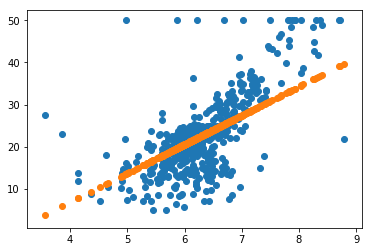

In [16]:
plt.show()